In [1]:
import pandas as pd
import numpy as np
import pyross
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('data-by-day.csv', parse_dates = ['date_of_interest'])

In [18]:
df['daily_death_rate'] = df['DEATH_COUNT']/df['CASE_COUNT']
df['cum_case'] = df['CASE_COUNT'].cumsum()
df['cum_death'] = df['DEATH_COUNT'].cumsum()
df['death_rate'] = df['cum_death']/df['cum_case']
df['growth_rate'] = df['CASE_COUNT'].div(df['cum_case'].shift(1))
gamma = 1/7
df['Rt'] = (df['growth_rate']/gamma)+1
df['ratio'] = df['cum_case'].div(df['cum_case'].shift(1))

In [25]:
df['natural_death_rate'] = df['DEATH_COUNT']/18804000

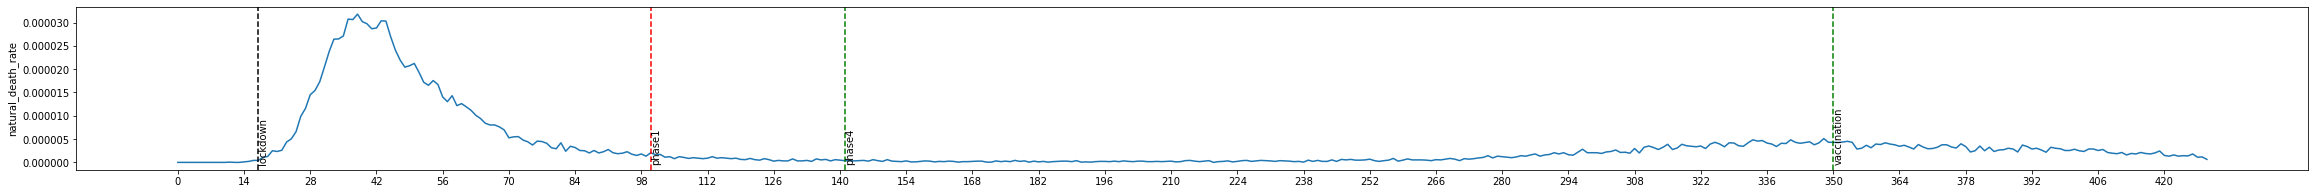

In [26]:
plt.rcParams["figure.figsize"] = (40,3)
plt.plot(df['natural_death_rate'])
plt.ylabel('natural_death_rate')
plt.xticks(np.arange(0, 430, 14.0))
plt.axvline(x=17,color='k', linestyle='--')
plt.text(17,0,'lockdown',rotation=90)
plt.axvline(x=100,color='r', linestyle='--')
plt.text(100,0,'phase1',rotation=90)
plt.axvline(x=141,color='g', linestyle='--')
plt.text(141,0,'phase4',rotation=90)
plt.axvline(x=350,color='g', linestyle='--')
plt.text(350,0,'vaccination',rotation=90)
plt.show()

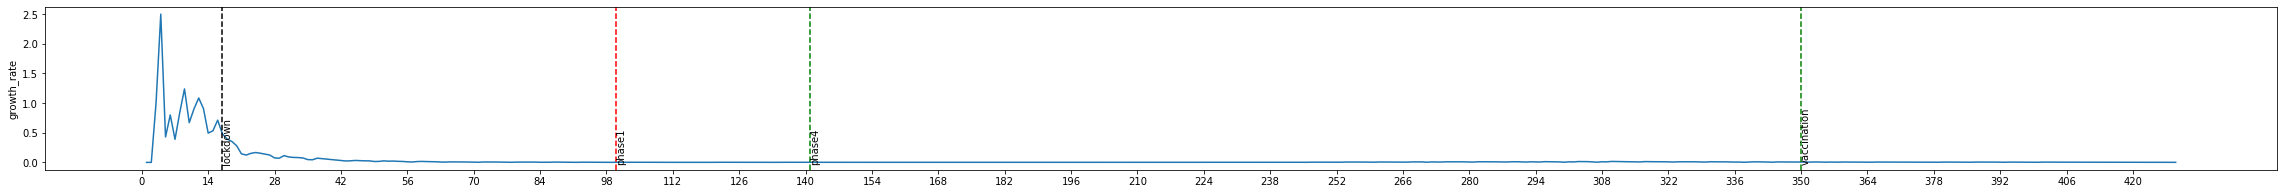

In [19]:
# growth_rate
plt.rcParams["figure.figsize"] = (40,3)
plt.plot(df['growth_rate'])
plt.ylabel('growth_rate')
plt.xticks(np.arange(0, 430, 14.0))
plt.axvline(x=17,color='k', linestyle='--')
plt.text(17,0,'lockdown',rotation=90)
plt.axvline(x=100,color='r', linestyle='--')
plt.text(100,0,'phase1',rotation=90)
plt.axvline(x=141,color='g', linestyle='--')
plt.text(141,0,'phase4',rotation=90)
plt.axvline(x=350,color='g', linestyle='--')
plt.text(350,0,'vaccination',rotation=90)
plt.show()

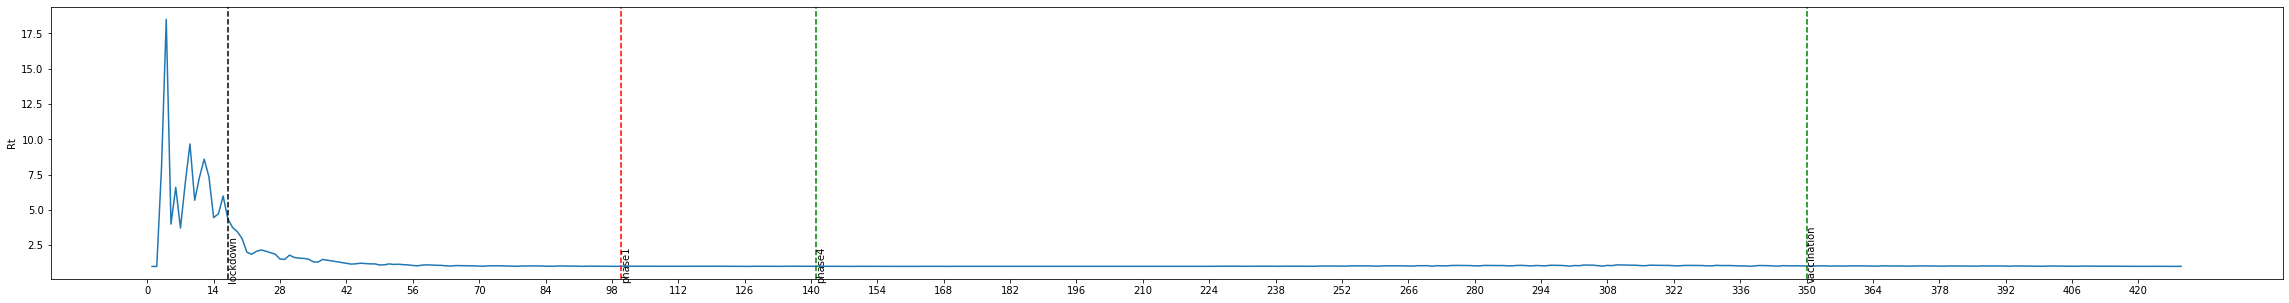

In [20]:
# Rt
plt.rcParams["figure.figsize"] = (40,5)
plt.plot(df['Rt'])
plt.ylabel('Rt')
plt.xticks(np.arange(0, 430, 14.0))
plt.axvline(x=17,color='k', linestyle='--')
plt.text(17,0,'lockdown',rotation=90)
plt.axvline(x=100,color='r', linestyle='--')
plt.text(100,0,'phase1',rotation=90)
plt.axvline(x=141,color='g', linestyle='--')
plt.text(141,0,'phase4',rotation=90)
plt.axvline(x=350,color='g', linestyle='--')
plt.text(350,0,'vaccination',rotation=90)
plt.show()

### Before Lockdown

In [229]:
S=E=I=R=[]

In [230]:
lockdown_idx=17
idx=lockdown_idx

In [231]:
#If we use 2% death rate of COVID19 before lockdown, gamma = 1/7, given our average Rt (1.29)to estimate R0.
r0 = df.loc[:idx,'Rt'].mean()
s0 = 1
gamma = 1/7
d = 0.006
k = 1/2 #0.96
beta = r0*((gamma+d)/s0)*((k+d)/k)
print('inferred beta from real data is:', round(beta,4))

inferred beta from real data is: 0.9558


In [232]:
M = 1                  # the SIR model has no age structure
Ni =  18804000*np.ones(M)   # so there is only one age group 
N = np.sum(Ni)         # and the total population is the size of this age group

alpha = 0            # fraction of asymptomatic infectives 
#beta  = 0.52            # infection rate 
gIa   = gamma           # removal rate of asymptomatic infectives 
gIs   = gamma            # removal rate of symptomatic infectives 
gE    = k          # removal rate of E
fsa   = 1              # Fraction by which symptomatic individuals do not self isolate

E0  = np.array([0])
Ia0 = np.array([0])     # the SIR model has only one kind of infective 
Is0 = np.array([1])     # we take these to be symptomatic 
R0  = np.array([0])     # and assume there are no removed individuals initially 
S0  = N-(Ia0+Is0+R0+E0)    # so that the initial susceptibles are obtained from S + Ia + Is + R = N

# there is no contact structure
def contactMatrix(t):   
    return np.identity(M) 

# duration of simulation and data file
Tf = 430;  Nt=430;  

# instantiate model
parameters = {'alpha':alpha, 'beta':beta, 'gIa':gIa, 'gIs':gIs, 'gE':gE, 'fsa':fsa}
model = pyross.deterministic.SEIR(parameters, M, Ni)

# simulate model
data=model.simulate(S0, E0, Ia0, Is0, contactMatrix, Tf, Nt)

In [233]:
S  = list(data['X'][:,0].flatten()[:idx])
E  = list(data['X'][:,1].flatten()[:idx])
#Ia = data['X'][:,2].flatten()
I = list(data['X'][:,3].flatten()[:idx])
#t = data['t'][:idx]

### Two weeks after lockdown

In [234]:
idx1=idx+14

In [235]:
r0 = df.loc[idx:idx1,'Rt'].mean()
s0 = 1
gamma = 1/7
d = 0.006
k = 1/2 #0.96
beta = r0*((gamma+d)/s0)*((k+d)/k)
print('inferred beta from real data is:', round(beta,4))

inferred beta from real data is: 0.352


In [236]:
M = 1                  # the SIR model has no age structure
Ni =  18804000*np.ones(M)   # so there is only one age group 
N = np.sum(Ni)         # and the total population is the size of this age group

alpha = 0            # fraction of asymptomatic infectives 
#beta  = 0.52            # infection rate 
gIa   = gamma           # removal rate of asymptomatic infectives 
gIs   = gamma            # removal rate of symptomatic infectives 
gE    = k          # removal rate of E
fsa   = 1              # Fraction by which symptomatic individuals do not self isolate

E0  = np.array([E[-1]])
Ia0 = np.array([0])     # the SIR model has only one kind of infective 
Is0 = np.array([I[-1]])     # we take these to be symptomatic 
S0  = np.array([S[-1]])    # so that the initial susceptibles are obtained from S + Ia + Is + R = N
R0  = N-E0-Ia0-Is0-S0     # and assume there are no removed individuals initially 

# there is no contact structure
def contactMatrix(t):   
    return np.identity(M) 

# duration of simulation and data file
Tf = 430;  Nt=430;  

# instantiate model
parameters = {'alpha':alpha, 'beta':beta, 'gIa':gIa, 'gIs':gIs, 'gE':gE, 'fsa':fsa}
model = pyross.deterministic.SEIR(parameters, M, Ni)

# simulate model
data=model.simulate(S0, E0, Ia0, Is0, contactMatrix, Tf, Nt)

In [237]:
S  += list(data['X'][:,0].flatten()[idx:idx1])
E  += list(data['X'][:,1].flatten()[idx:idx1])
#Ia = data['X'][:,2].flatten()
I += list(data['X'][:,3].flatten()[idx:idx1])
#R += N-S-E-I
#t += data['t'][idx:idx1]

### After cool period

In [238]:
idx2=430

In [239]:
r0 = df.loc[idx1:idx2,'Rt'].mean()
s0 = 1
gamma = 1/7
d = 0.006
k = 1/2 #0.96
beta = r0*((gamma+d)/s0)*((k+d)/k)
print('inferred beta from real data is:', round(beta,4))

inferred beta from real data is: 0.1575


In [240]:
M = 1                  # the SIR model has no age structure
Ni =  18804000*np.ones(M)   # so there is only one age group 
N = np.sum(Ni)         # and the total population is the size of this age group

alpha = 0            # fraction of asymptomatic infectives 
#beta  = 0.52            # infection rate 
gIa   = gamma           # removal rate of asymptomatic infectives 
gIs   = gamma            # removal rate of symptomatic infectives 
gE    = k          # removal rate of E
fsa   = 1              # Fraction by which symptomatic individuals do not self isolate

E0  = np.array([E[-1]])
Ia0 = np.array([0])     # the SIR model has only one kind of infective 
Is0 = np.array([I[-1]])     # we take these to be symptomatic 
S0  = np.array([S[-1]])    # so that the initial susceptibles are obtained from S + Ia + Is + R = N
R0  = N-E0-Ia0-Is0-S0     # and assume there are no removed individuals initially 

# there is no contact structure
def contactMatrix(t):   
    return np.identity(M) 

# duration of simulation and data file
Tf = 430;  Nt=430;  

# instantiate model
parameters = {'alpha':alpha, 'beta':beta, 'gIa':gIa, 'gIs':gIs, 'gE':gE, 'fsa':fsa}
model = pyross.deterministic.SEIR(parameters, M, Ni)

# simulate model
data=model.simulate(S0, E0, Ia0, Is0, contactMatrix, Tf, Nt)

In [241]:
S  += list(data['X'][:,0].flatten()[idx1:idx2])
E  += list(data['X'][:,1].flatten()[idx1:idx2])
#Ia = data['X'][:,2].flatten()
I += list(data['X'][:,3].flatten()[idx1:idx2])
#R += N-S-E-I
t = data['t']

In [242]:
S=np.array(S)
E=np.array(E)
I=np.array(I)
R=N-S-E-I

In [ ]:
### reburse
### vaccination

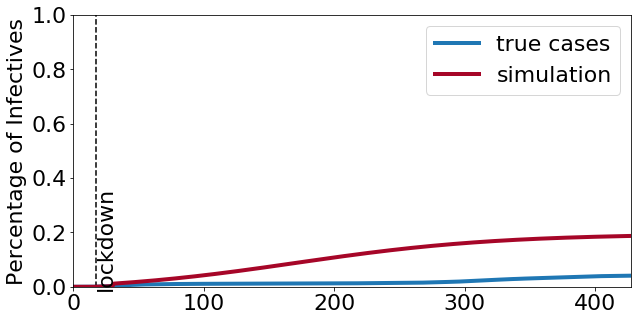

In [247]:
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(df['cum_case']/18804000, lw=4,label = 'true cases')
plt.ylabel('Percentage of Infectives')
plt.xticks(np.arange(0, 428, 100))
plt.axvline(x=idx,color='k', linestyle='--')
plt.text(idx,0,'lockdown',rotation=90)
#plt.axvline(x=idx1,color='r', linestyle='--')
#plt.text(idx1,0,'Phasr',rotation=90)
#plt.axvline(x=141,color='g', linestyle='--')
#plt.text(141,0,'phase4',rotation=90)
#plt.axvline(x=350,color='g', linestyle='--')
#plt.text(350,0,'vaccination',rotation=90)
plt.plot((I+R)/18804000, '-', color='#A60628', label='simulation', lw=4)
plt.ylim([0, 1])
plt.xlim([0, 428])
plt.legend()
plt.show()